##Методические указания

Text(0, 0.5, 'X2')

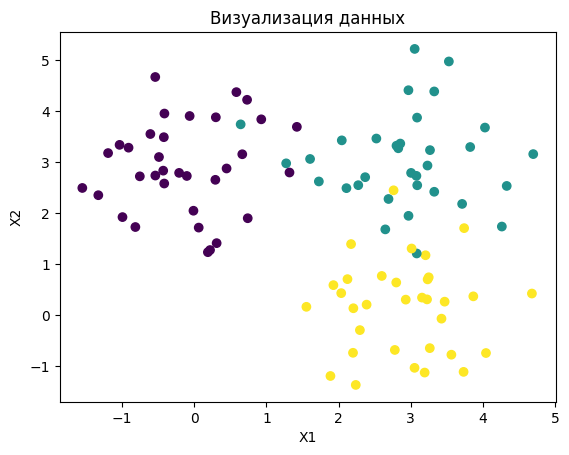

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)],
                                      n_features=2, random_state=42,
                                      cluster_std=(0.9,0.9,0.9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

depth=4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                                  random_state=42)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

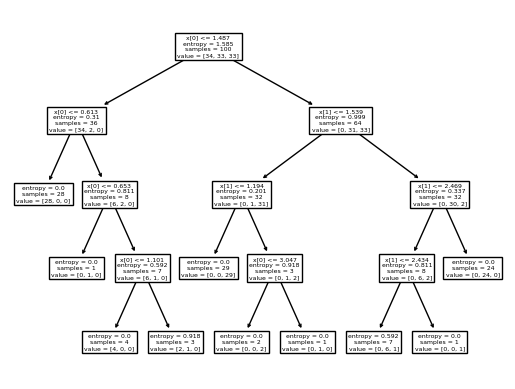

In [ ]:
from sklearn import tree

tree.plot_tree(clf_tree)
plt.show()

In [ ]:
import numpy as np


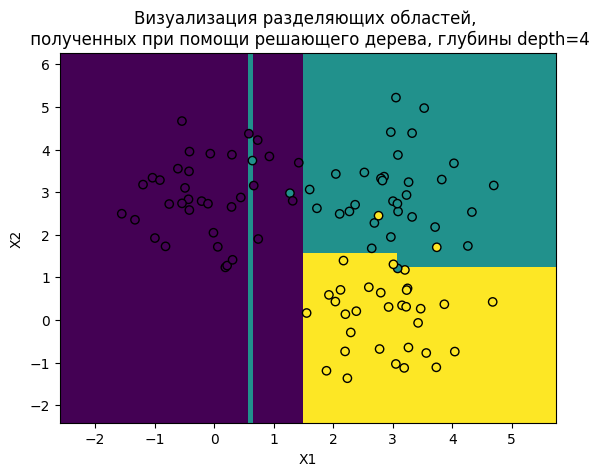

In [ ]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score


y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 1 32  0]
 [ 0  1 32]]
Accuracy = 0.98
F1_score = 0.98


In [ ]:
observation_new = [[2, 1]]
clf_tree.predict(observation_new)


array([2])

In [ ]:
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = np.exp(X ** 2)+np.random.normal(0.0, 0.1, X.shape[0])

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X_reshaped = X.reshape(-1, 1)

depth = 3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
reg_tree.fit(X_reshaped, y)


DecisionTreeRegressor(max_depth=3, random_state=42)

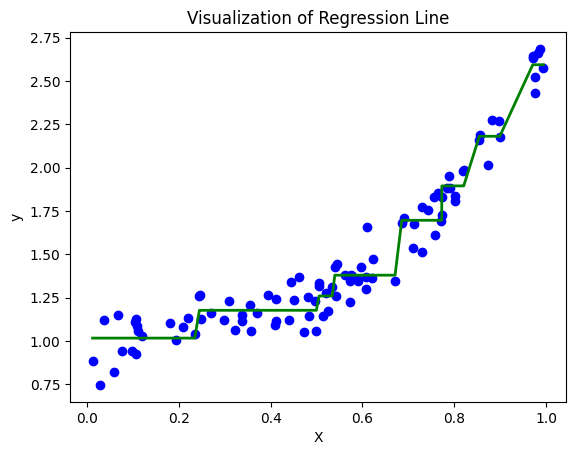

In [ ]:
y_pred_reg = reg_tree.predict(X_reshaped)

plt.scatter(X, y, c="b")
plt.plot(X, y_pred_reg, "g", lw=2)
plt.title('Visualization of Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

r2=  0.9597858487406206
MSE=  0.008474622656504225


In [ ]:
observation_new = [[0.7]]

##Задания для самостоятельного выполнения

#### 1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.

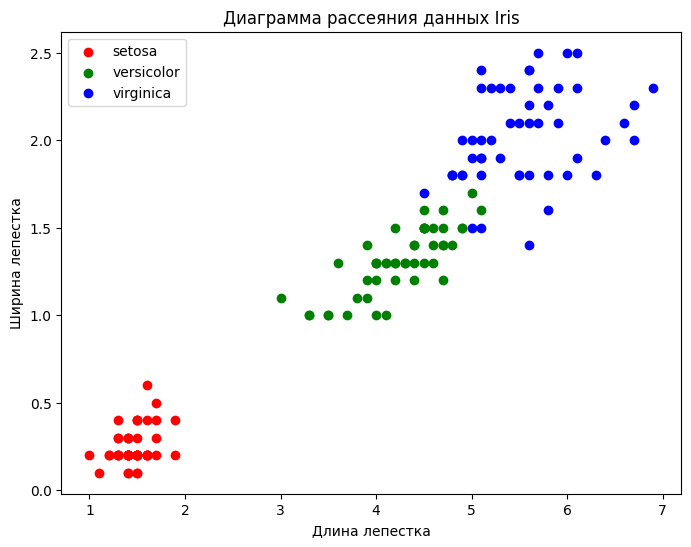

In [ ]:
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data[:, 2:]  # Длина и ширина лепестков
y = iris.target

plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(len(colors)):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=colors[i], label=iris.target_names[i])

plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.title('Диаграмма рассеяния данных Iris')
plt.legend(loc='best')
plt.show()


#### 2. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.

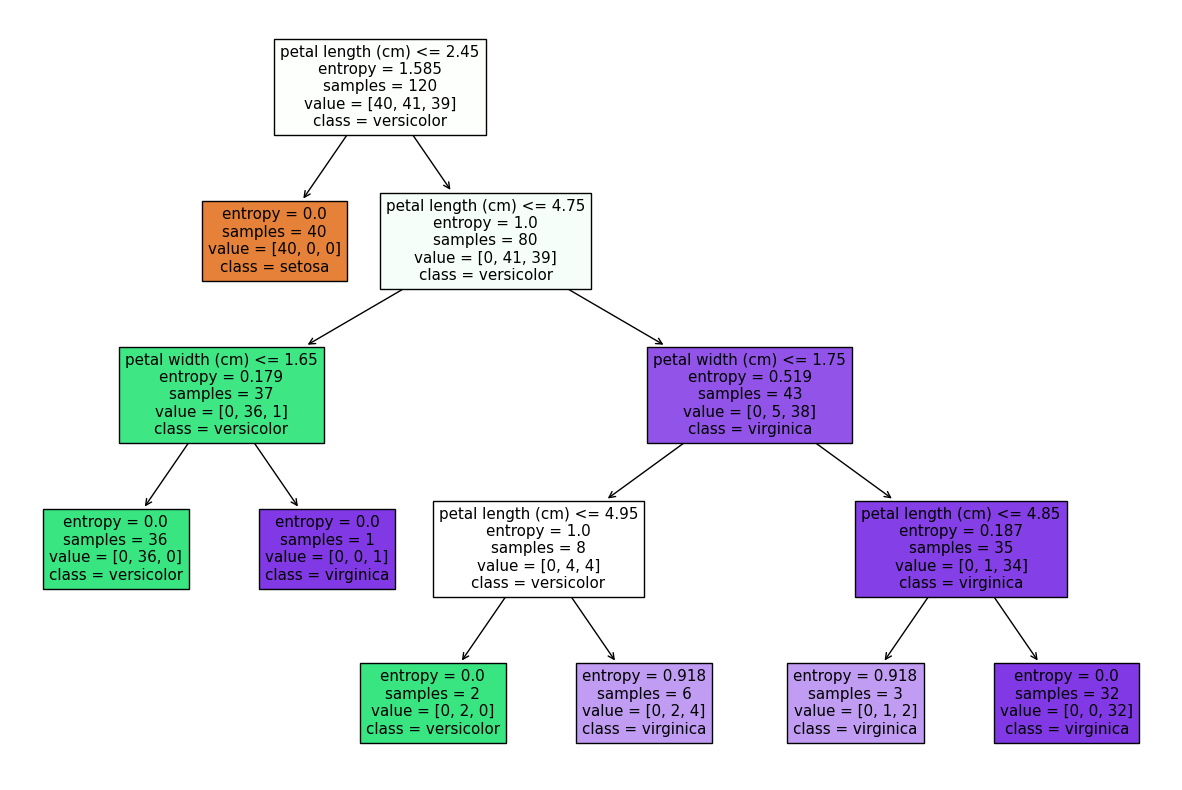

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(max_depth=4, criterion='entropy')
clf.fit(X_train, y_train)


plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names[2:], class_names=iris.target_names)
plt.show()


####3. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.

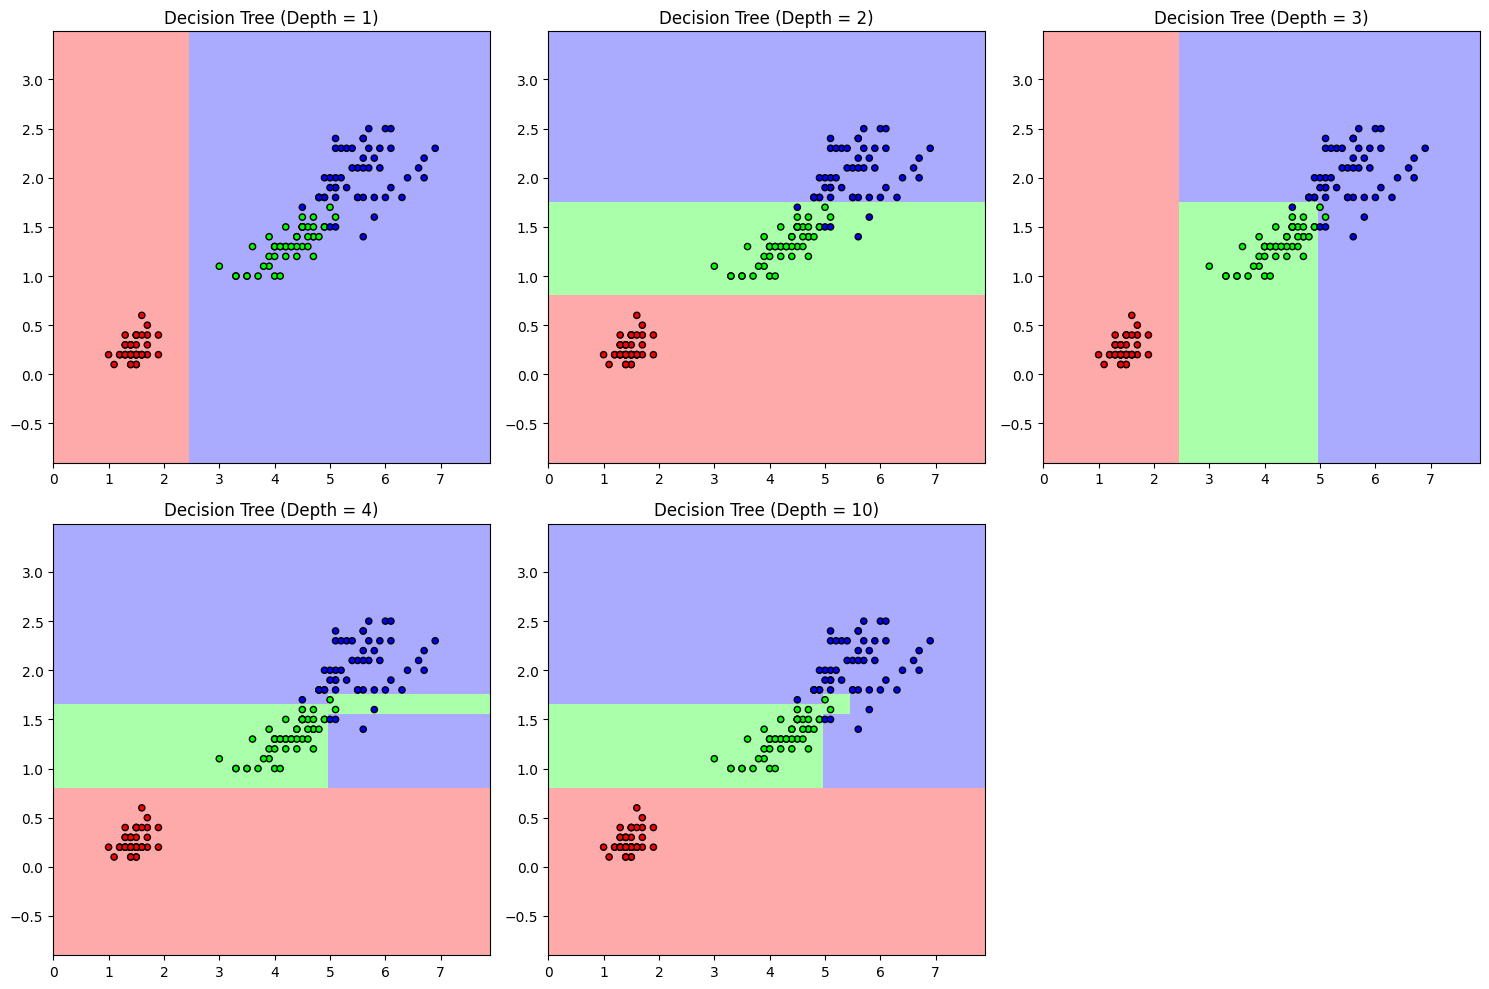

In [ ]:
from matplotlib.colors import ListedColormap

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

# Создание цветовой карты для визуализации разделяющих областей
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Создание сетки для визуализации разделяющих областей
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Обучение и визуализация моделей с разными глубинами дерева
depths = [1, 2, 3, 4, 10]
plt.figure(figsize=(15, 10))
for i, depth in enumerate(depths, 1):
    plt.subplot(2, 3, i)

    clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    clf.fit(X, y)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Tree (Depth = %d)" % depth)

plt.tight_layout()
plt.show()


#### 4. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.

In [ ]:
accuracies = []
f1_scores = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')  # Усреднение по классам для F1-меры
    accuracies.append(accuracy)
    f1_scores.append(f1)

    print(f"Глубина дерева: {depth}")
    print("Матрица ошибок:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy)
    print("F1-мера:", f1)
    print()

print("Средние значения метрик:")
print("Средняя точность (accuracy):", np.mean(accuracies))
print("Средняя F1-мера:", np.mean(f1_scores))

Глубина дерева: 1
Матрица ошибок:
[[10  0  0]
 [ 0  9  0]
 [ 0 11  0]]
Accuracy: 0.6333333333333333
F1-мера: 0.5402298850574713

Глубина дерева: 2
Матрица ошибок:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Accuracy: 0.9666666666666667
F1-мера: 0.9658994032395567

Глубина дерева: 3
Матрица ошибок:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
F1-мера: 1.0

Глубина дерева: 4
Матрица ошибок:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
F1-мера: 1.0

Глубина дерева: 10
Матрица ошибок:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
F1-мера: 1.0

Средние значения метрик:
Средняя точность (accuracy): 0.9199999999999999
Средняя F1-мера: 0.9012258576594057


#### 5. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.


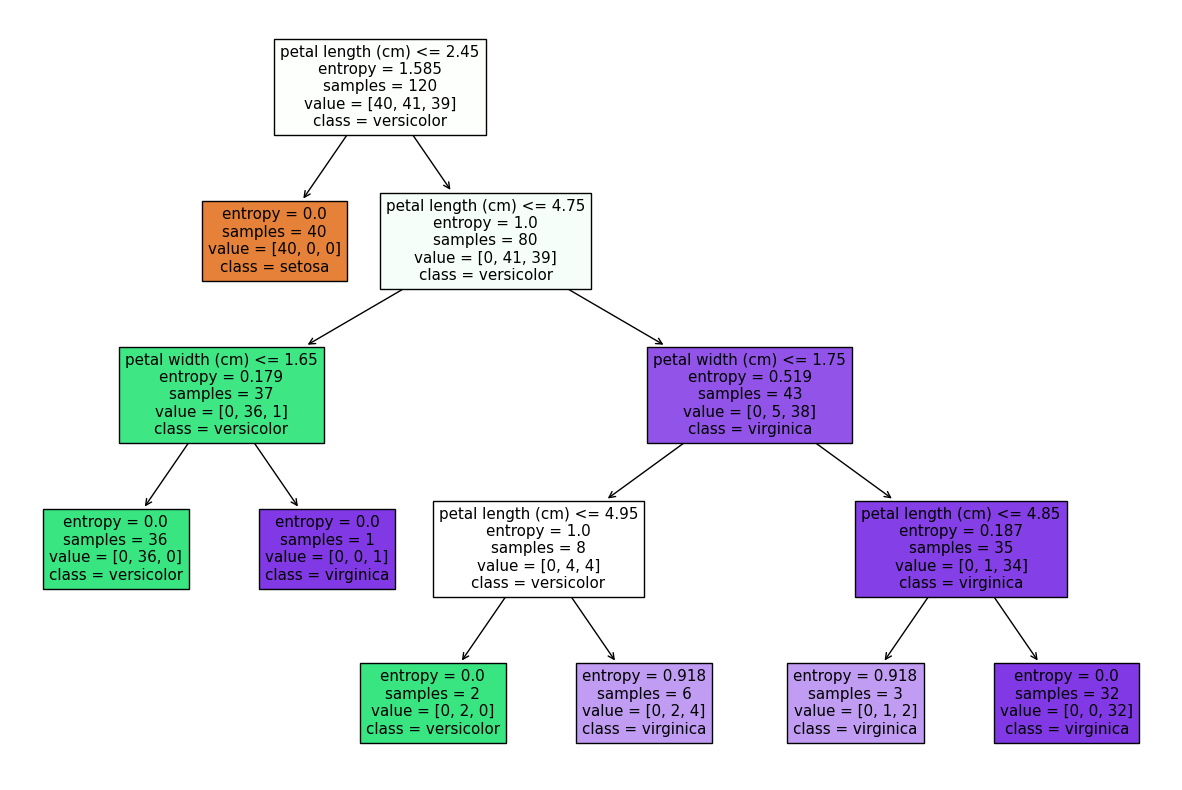

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.metrics import classification_report

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=4, criterion='entropy')
clf.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


#### 6. Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

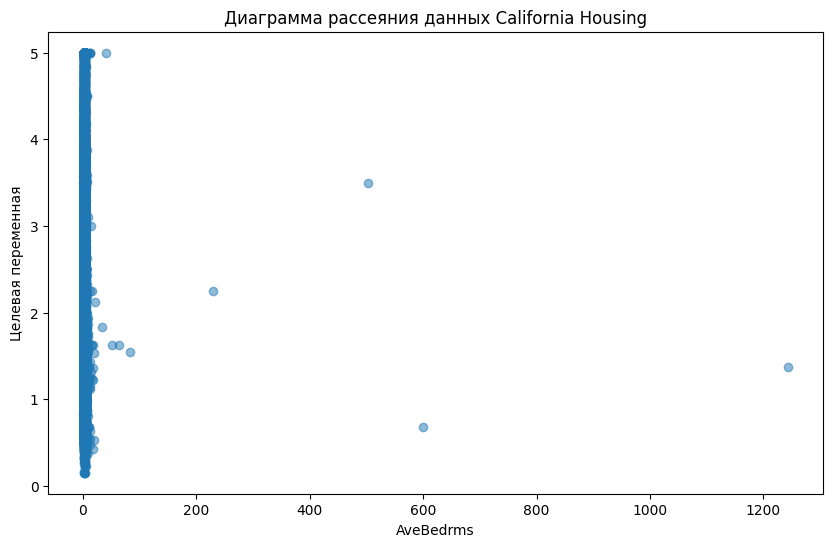

In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()
X = california_housing.data[:, 5:6]  # Выбираем только столбец AveBedrms в качестве признака
y = california_housing.target

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.title('Диаграмма рассеяния данных California Housing')
plt.xlabel('AveBedrms')
plt.ylabel('Целевая переменная')
plt.show()


#### 7. Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.

In [ ]:
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.5008492183132024


#### 8. Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.

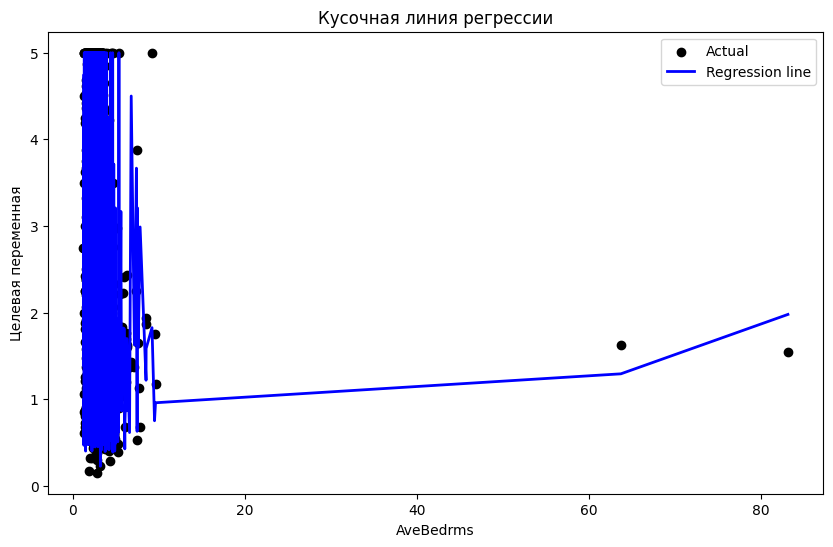

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Предсказание на тестовом наборе данных
y_pred_bedrooms = regressor.predict(X_test)

# Сортировка данных для линии регрессии
sorted_indices = np.argsort(X_test[:, 5])
X_test_bedrooms_sorted = X_test[sorted_indices]
y_pred_bedrooms_sorted = y_pred_bedrooms[sorted_indices]

# Визуализация кусочной линии регрессии
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 5], y_test, color='black', label='Actual')
plt.plot(X_test_bedrooms_sorted[:, 5], y_pred_bedrooms_sorted, color='blue', linewidth=2, label='Regression line')
plt.xlabel('AveBedrms')
plt.ylabel('Целевая переменная')
plt.title('Кусочная линия регрессии')
plt.legend()
plt.show()


#### 9. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.5008492183132024
R^2 Score: 0.617791676774418
Mean Absolute Error: 0.4568540915697674


#### 10. Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.

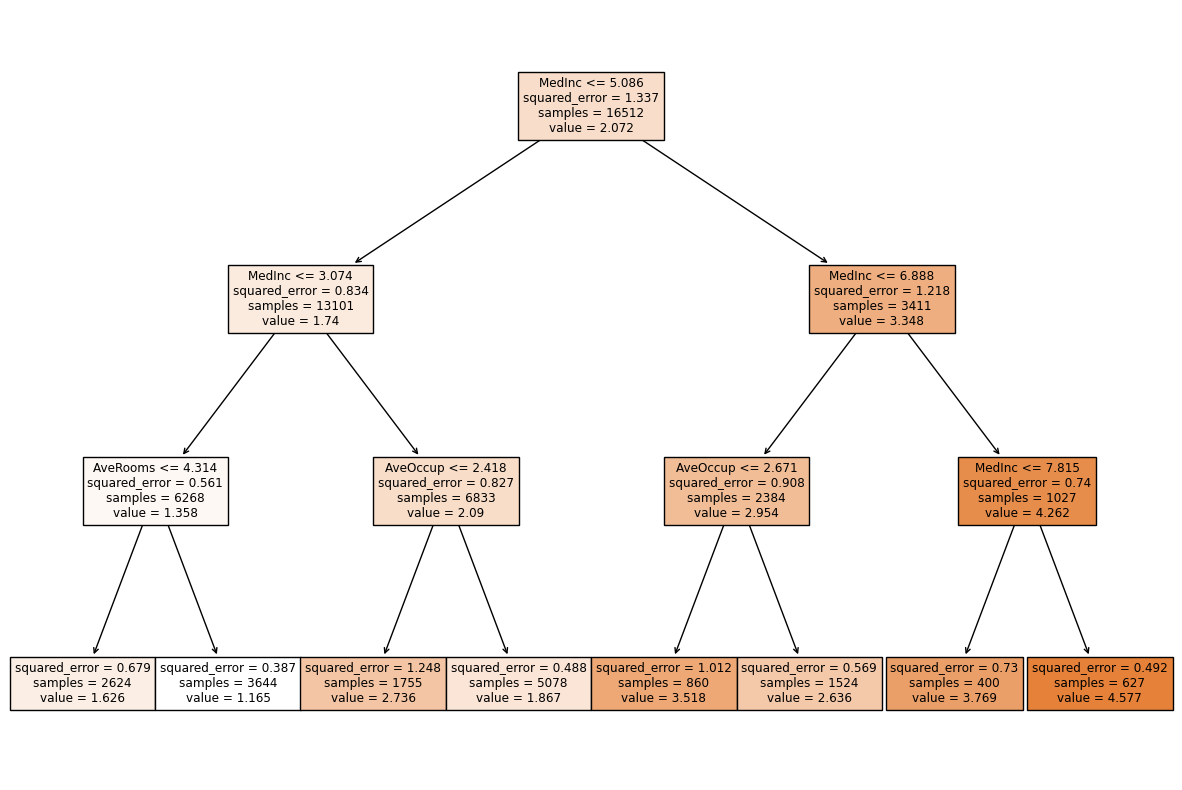

Mean Squared Error: 0.6424109810265641


In [ ]:
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(max_depth=3, random_state=0)
regressor.fit(X_train, y_train)

plt.figure(figsize=(15,10))
plot_tree(regressor, filled=True, feature_names=california_housing.feature_names)
plt.show()

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
